# Classification Model Evaluation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

## Model Selection Process

### Data Cleaning and Preparation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read data
diabetes = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Dimensions of the data set
print(diabetes.shape)

(768, 9)


In [ ]:
# Remove unusual rows of data
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

# Dimensions of data set after cleansing
print(diabetes_mod.shape)

(724, 9)


### Feature Selection

In [ ]:
# Features/Response
feature_names = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

### Model Selection - Logistic Regression

In [ ]:
logreg = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

## Model Evaluation Procedures

### 01. Train/Test Split

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy {}".format(accuracy))

Accuracy 0.7955801104972375


### 02. K-Fold Cross Validation

In [ ]:
accuracy = cross_val_score(logreg, X, y, cv = 10, scoring='accuracy').mean()

print("Accuracy {}".format(accuracy))

Accuracy 0.7790525114155251


## Model Evaluation Metrics

##01.Classification Accuracy

### 02. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Method to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[108  11]
 [ 26  36]]


Confusion matrix, without normalization
[[108  11]
 [ 26  36]]


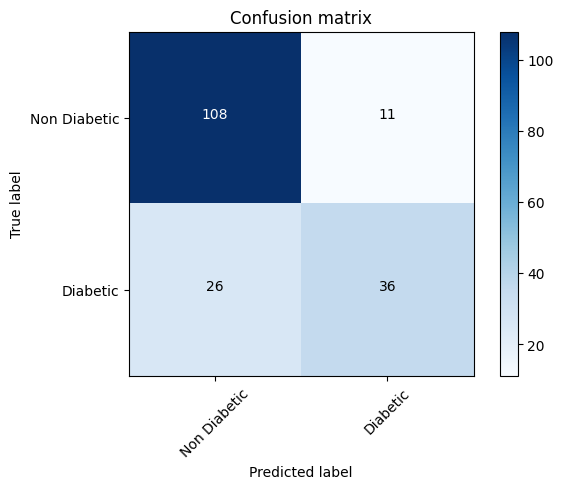

In [ ]:
plot_confusion_matrix(confusion, classes=['Non Diabetic', 'Diabetic'], title='Confusion matrix')

In [ ]:
# True Positives
TP = confusion[1, 1]

# True Negatives
TN = confusion[0, 0]

# False Positives
FP = confusion[0, 1]

# False Negatives
FN = confusion[1, 0]

### 03. Metrics computed from the Confusion Matrix

In [ ]:
from sklearn.metrics import recall_score, precision_score

#### Classification accuracy

In [ ]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.7955801104972375
0.7955801104972375


#### Sensitivity/Recall

In [ ]:
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))

0.5806451612903226
0.5806451612903226


#### Specificity

In [ ]:
print(TN / float(TN + FP))

0.907563025210084


#### False Positive Rate

In [ ]:
print(FP / float(TN + FP))

0.09243697478991597


#### Precision

In [ ]:
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.7659574468085106
0.7659574468085106


### Adjusting Classification Threshold

In [ ]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.80085377, 0.19914623],
       [0.70450063, 0.29549937],
       [0.81765257, 0.18234743],
       [0.45582948, 0.54417052],
       [0.32622925, 0.67377075],
       [0.79674719, 0.20325281],
       [0.74752722, 0.25247278],
       [0.64438483, 0.35561517],
       [0.62830673, 0.37169327],
       [0.69703945, 0.30296055]])

In [ ]:
# store the predicted probabilities for class 1 (diabetic)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

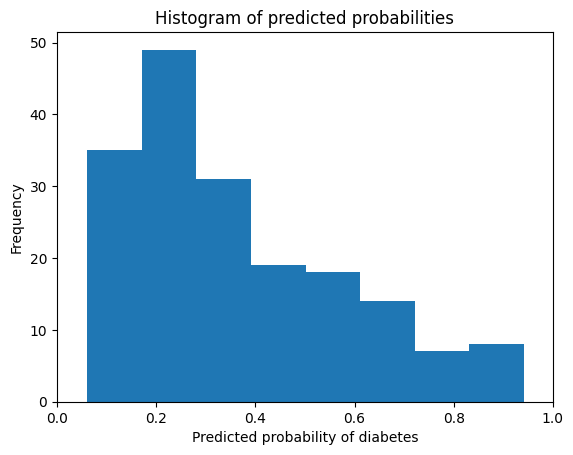

In [ ]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8, linewidth=1.2)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [ ]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize

# Reshape y_pred_prob to a 2D array
y_pred_prob_2d = y_pred_prob.reshape(-1, 1)

# Binarize the 2D array
y_pred_class = binarize(y_pred_prob_2d, threshold=0.3)

In [ ]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[108  11]
 [ 26  36]]


In [ ]:
# new confusion matrix (threshold of 0.3)
confusion_new = confusion_matrix(y_test, y_pred_class)
print(confusion_new)

[[82 37]
 [ 8 54]]


In [ ]:
# True Positives
TP = confusion_new[1, 1]

# True Negatives
TN = confusion_new[0, 0]

# False Positives
FP = confusion_new[0, 1]

# False Negatives
FN = confusion_new[1, 0]

In [ ]:
# sensitivity has increased
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred_class))

0.8709677419354839
0.8709677419354839


In [ ]:
# specificity has decreased
print(TN / float(TN + FP))

0.6890756302521008


### 04. ROC Curves and Area Under the Curve (AUC)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

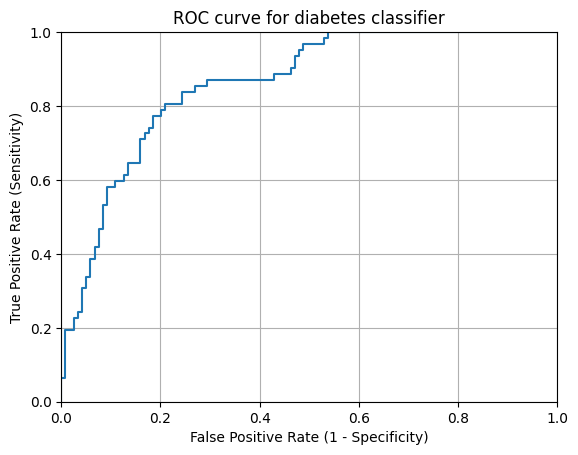

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [ ]:
evaluate_threshold(0.3)

Sensitivity: 0.8709677419354839
Specificity: 0.7058823529411764


In [ ]:
evaluate_threshold(0.5)

Sensitivity: 0.5806451612903226
Specificity: 0.907563025210084


In [ ]:
print(roc_auc_score(y_test, y_pred_prob))

0.8587693141772839


In [ ]:
# calculate cross-validated AUC
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8374390514184398